In [2]:
library(tidyverse)
ggplot2::theme_set(theme_bw())

library(showtext)
font_add("nanum", "NanumGothic.ttf")
showtext_auto()

font_add_google(name = "Black Han Sans", family = "blackhansans")
showtext_auto()

setwd("C:/Soongsil/R/Textmining")

### 04-01 감정사전 활용

In [3]:
dic <- read_csv("knu_sentiment_lexicon.csv")

Rows: 14854 Columns: 2
-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ","
chr (1): word
dbl (1): polarity

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


- word : 감정단어
- polarity : 감정의 정도

In [6]:
dic %>% print

# A tibble: 14,854 x 2
   word  polarity
   <chr>    <dbl>
 1 ㅡㅡ        -1
 2 ㅠㅠ        -1
 3 ㅠ_ㅠ       -1
 4 ㅠ          -1
 5 ㅜㅡ        -1
 6 ㅜㅜ        -1
 7 ㅜ_ㅜ       -1
 8 ㅜ.ㅜ       -1
 9 ㅜ          -1
10 ㅗ          -1
# ... with 14,844 more rows


In [7]:
dic %>% mutate(sentiment = ifelse(polarity >= 1, "pos",
                                 ifelse(polarity <= -1, "neg", "neu"))) %>%
    count(sentiment)

sentiment,n
<chr>,<int>
neg,9829
neu,154
pos,4871


### 문장의 감정 점수 구하기

In [11]:
df <- tibble(sentence = c("디자인 예쁘고 마감도 좋아서 만족스럽다.",
                          "디자인은 괜찮다. 그런데 마감이 나쁘고 가격도 비싸다."))

In [12]:
library(tidytext)
df <- df %>% 
  unnest_tokens(input = sentence,
                output = word,
                token = "words",
                drop = F)

In [14]:
df %>% print

# A tibble: 12 x 2
   sentence                                             word      
   <chr>                                                <chr>     
 1 디자인 예쁘고 마감도 좋아서 만족스럽다.              디자인    
 2 디자인 예쁘고 마감도 좋아서 만족스럽다.              예쁘고    
 3 디자인 예쁘고 마감도 좋아서 만족스럽다.              마감도    
 4 디자인 예쁘고 마감도 좋아서 만족스럽다.              좋아서    
 5 디자인 예쁘고 마감도 좋아서 만족스럽다.              만족스럽다
 6 디자인은 괜찮다. 그런데 마감이 나쁘고 가격도 비싸다. 디자인은  
 7 디자인은 괜찮다. 그런데 마감이 나쁘고 가격도 비싸다. 괜찮다    
 8 디자인은 괜찮다. 그런데 마감이 나쁘고 가격도 비싸다. 그런데    
 9 디자인은 괜찮다. 그런데 마감이 나쁘고 가격도 비싸다. 마감이    
10 디자인은 괜찮다. 그런데 마감이 나쁘고 가격도 비싸다. 나쁘고    
11 디자인은 괜찮다. 그런데 마감이 나쁘고 가격도 비싸다. 가격도    
12 디자인은 괜찮다. 그런데 마감이 나쁘고 가격도 비싸다. 비싸다    


### 단어에 감정 점수 부여

In [15]:
df <- df %>%
    left_join(dic, by = "word") %>%
    mutate(polarity = ifelse(is.na(polarity), 0, polarity))

### 문장별로 감정 점수 합산

In [17]:
score_df <- df %>%
    group_by(sentence) %>%
    summarise(score = sum(polarity))

In [18]:
score_df %>% print

# A tibble: 2 x 2
  sentence                                             score
  <chr>                                                <dbl>
1 디자인 예쁘고 마감도 좋아서 만족스럽다.                  6
2 디자인은 괜찮다. 그런데 마감이 나쁘고 가격도 비싸다.    -3


### 04-02 댓글 감정 분석

In [25]:
raw_news_comment <- read_csv("news_comment_parasite.csv")
raw_news_comment %>% print

Rows: 4150 Columns: 5
-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ","
chr  (4): reply, press, title, url
dttm (1): reg_time

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 4,150 x 5
   reg_time            reply                                   press title url  
   <dttm>              <chr>                                   <chr> <chr> <chr>
 1 2020-02-10 16:59:02 "정말 우리 집에 좋은 일이 생겨 기쁘고 ~ MBC   '기~  http~
 2 2020-02-10 13:32:24 "와 너무 기쁘다! 이 시국에 정말 내 일~  SBS   [영~  http~
 3 2020-02-10 12:30:09 "우리나라의 영화감독분들 그리고 앞으로~ 한겨~ ‘기~  http~
 4 2020-02-10 13:08:22 "봉준호 감독과 우리나라 대한민국 모두 ~ 한겨~ ‘기~  http~
 5 2020-02-10 16:25:41 "노벨상 탄느낌이네요\n축하축하 합니다"  한겨~ ‘기~  http~
 6 2020-02-10 12:31:45 "기생충 상 받을때 박수 쳤어요.감독상도~ 한겨~ ‘기~  http~
 7 2020-02-10 12:31:33 "대한민국 영화사를 새로 쓰고 계시네요 ~ 한겨~ ‘기~  http~
 8 2020-02-11 09:20:52 "저런게 아카데미상 받으면  '태극기 휘~  한겨~ ‘기~  http~
 9 2020-02-10 20:53:27 "다시한번 보여주세요 영화관에서 보고싶~ 한겨~ ‘기~  http~
10 2020-02-10 20:22:41 "대한민국 BTS와함께  봉준호감독님까지\~ 한겨~ ‘기~  http~
# ... with 4,140 more rows


### 기본적인 전처리
- 고유 번호 변수 생성 : ```mutate()```와 ```row_number()```를 이용해 고유 번호 ```id```추가
- html 특수 문자 제거 : 웹에서 만들어진 텍스트는 &npsp;등의 html 특수 문자가 포함되어 있어서 내용을 알아보기 불편
- 특수 문자와 두 글자 미만 단어 포함

### ```replace_html()``` : html태그를 공백으로 바꿈

In [22]:
library(textclean)

In [24]:
news_comment <- raw_news_comment %>%
    mutate(id = row_number(),
          reply = str_squish(replace_html(reply)))

glimpse(news_comment)

Rows: 4,150
Columns: 6
$ reg_time <dttm> 2020-02-10 16:59:02, 2020-02-10 13:32:24, 2020-02-10 12:30:0~
$ reply    <chr> "정말 우리 집에 좋은 일이 생겨 기쁘고 행복한 것처럼!! 나의 일~
$ press    <chr> "MBC", "SBS", "한겨레", "한겨레", "한겨레", "한겨레", "한겨레~
$ title    <chr> "'기생충' 아카데미 작품상까지 4관왕…영화사 새로 썼다", "[영~
$ url      <chr> "https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=1~
$ id       <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18~


### 단어 기준으로 토큰화, 감정 점수 부여

In [27]:
word_comment <- news_comment %>%
    unnest_tokens(input = reply,
                 output = word,
                 token = "words",
                 drop = F)

word_comment %>%
    select(word, reply) %>% print

# A tibble: 37,718 x 2
   word   reply                                                                
   <chr>  <chr>                                                                
 1 정말   정말 우리 집에 좋은 일이 생겨 기쁘고 행복한 것처럼!! 나의 일인 양 행~
 2 우리   정말 우리 집에 좋은 일이 생겨 기쁘고 행복한 것처럼!! 나의 일인 양 행~
 3 집에   정말 우리 집에 좋은 일이 생겨 기쁘고 행복한 것처럼!! 나의 일인 양 행~
 4 좋은   정말 우리 집에 좋은 일이 생겨 기쁘고 행복한 것처럼!! 나의 일인 양 행~
 5 일이   정말 우리 집에 좋은 일이 생겨 기쁘고 행복한 것처럼!! 나의 일인 양 행~
 6 생겨   정말 우리 집에 좋은 일이 생겨 기쁘고 행복한 것처럼!! 나의 일인 양 행~
 7 기쁘고 정말 우리 집에 좋은 일이 생겨 기쁘고 행복한 것처럼!! 나의 일인 양 행~
 8 행복한 정말 우리 집에 좋은 일이 생겨 기쁘고 행복한 것처럼!! 나의 일인 양 행~
 9 것처럼 정말 우리 집에 좋은 일이 생겨 기쁘고 행복한 것처럼!! 나의 일인 양 행~
10 나의   정말 우리 집에 좋은 일이 생겨 기쁘고 행복한 것처럼!! 나의 일인 양 행~
# ... with 37,708 more rows


In [28]:
word_comment <- word_comment %>%
    left_join(dic, by = "word") %>%
    mutate(polarity = ifelse(is.na(polarity), 0, polarity))

word_comment %>%
    select(word, polarity) %>% print

# A tibble: 37,718 x 2
   word   polarity
   <chr>     <dbl>
 1 정말          0
 2 우리          0
 3 집에          0
 4 좋은          2
 5 일이          0
 6 생겨          0
 7 기쁘고        2
 8 행복한        2
 9 것처럼        0
10 나의          0
# ... with 37,708 more rows


### 감정 분류

In [29]:
word_comment <- word_comment %>%
  mutate(sentiment = ifelse(polarity ==  2, "pos",
                     ifelse(polarity == -2, "neg", "neu")))

In [31]:
word_comment %>%
  count(sentiment) %>% print

# A tibble: 3 x 2
  sentiment     n
  <chr>     <int>
1 neg         285
2 neu       36671
3 pos         762


In [34]:
top10_sentiment <- word_comment %>%
  filter(sentiment != "neu") %>%
  count(sentiment, word) %>%
  group_by(sentiment) %>%
  slice_max(n, n = 10)

top10_sentiment %>% print

# A tibble: 22 x 3
# Groups:   sentiment [2]
   sentiment word       n
   <chr>     <chr>  <int>
 1 neg       소름      56
 2 neg       소름이    16
 3 neg       아니다    15
 4 neg       우울한     9
 5 neg       해         8
 6 neg       미친       7
 7 neg       가난한     5
 8 neg       어려운     5
 9 neg       힘든       5
10 neg       더러운     4
# ... with 12 more rows


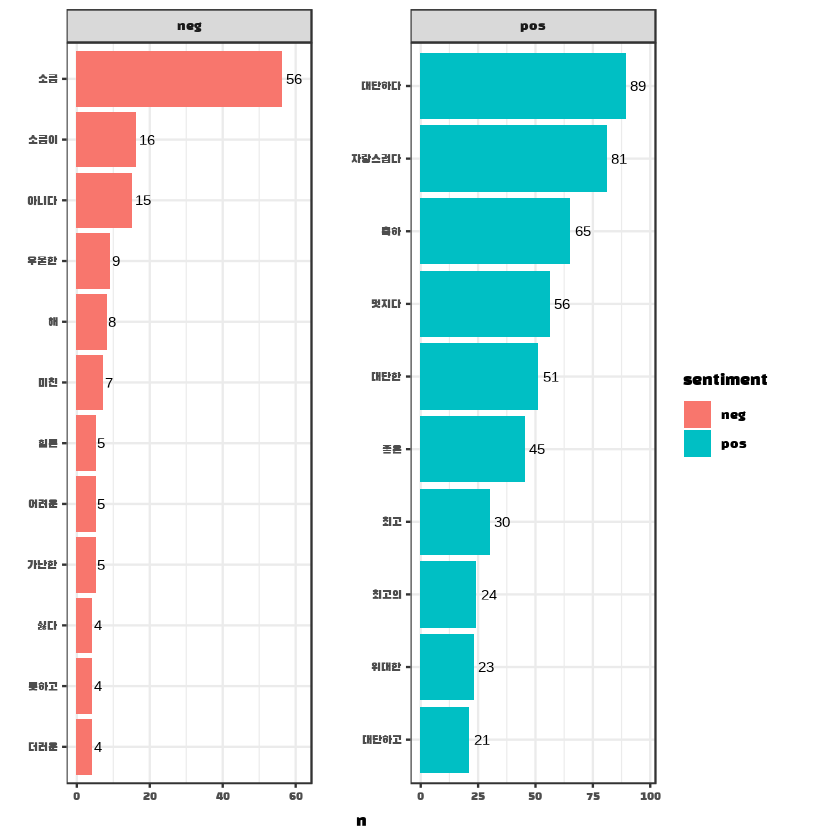

In [36]:
font_add_google(name = "Black Han Sans", family = "blackhansans")
showtext_auto()

ggplot(top10_sentiment, aes(x = reorder(word, n), 
                            y = n, 
                            fill = sentiment)) +
  geom_col() +
  coord_flip() +
  geom_text(aes(label = n), hjust = -0.3) +
  facet_wrap(~ sentiment, scales = "free") +
  scale_y_continuous(expand = expansion(mult = c(0.05, 0.15))) +  
  labs(x = NULL) +
  theme(text = element_text(family = "blackhansans"))

### 댓글별 감정 점수 구하고 내용 탐색

In [39]:
score_comment <- word_comment %>%
  group_by(id, reply) %>%
  summarise(score = sum(polarity)) %>%
  ungroup()

score_comment %>% 
    select(score, reply) %>% 
    arrange(-score) %>% print

score_comment %>% 
    select(score, reply) %>% 
    arrange(score) %>% print

`summarise()` has grouped output by 'id'. You can override using the `.groups` argument.


# A tibble: 4,140 x 2
   score reply                                                                  
   <dbl> <chr>                                                                  
 1    11 아니 다른상을 받은것도 충분히 대단하고 굉장하지만 최고의 영예인 작품상~
 2     9 봉준호의 위대한 업적은 진보 영화계의 위대한 업적이고 대한민국의 업적입~
 3     7 이 수상소식을 듣고 억수로 기뻐하는 가족이 있을것 같다. SNS를 통해 자기~
 4     7 감사 감사 감사 수상 소감도 3관왕 답네요                                
 5     6 정말 우리 집에 좋은 일이 생겨 기쁘고 행복한 것처럼!! 나의 일인 양 행복~
 6     6 와 너무 기쁘다! 이 시국에 정말 내 일같이 기쁘고 감사하다!!! 축하드려요~
 7     6 축하 축하 축하 모두들 수고 하셨어요 기생충 화이팅                      
 8     6 축하!!!! 축하!!!!! 오스카의 정복은 무엇보다 시나리오의 힘이다. 작가의 ~
 9     6 조여정 ㆍ예쁜얼굴때문에 연기력을 제대로 평가받지 못해 안타깝던 내가 좋~
10     6 좋은 걸 좋다고 말하지 못하는 인간들이 참 불쌍해지네....댓글 보니 인생~ 
# ... with 4,130 more rows
# A tibble: 4,140 x 2
   score reply                                                                  
   <dbl> <chr>                                                                  
 1    -7 기생충 영화 한국인 으로써 싫다 대단히 싫다!! 가난한 서민들의 마지막 자~
 2    -6 이 

### 감정 경향 탐색

감정 점수 빈도

In [40]:
score_comment %>%
  count(score) %>% print

# A tibble: 17 x 2
   score     n
   <dbl> <int>
 1    -7     1
 2    -6     1
 3    -5     1
 4    -4    17
 5    -3    35
 6    -2   175
 7    -1   206
 8     0  2897
 9     1   222
10     2   432
11     3    57
12     4    71
13     5     7
14     6    14
15     7     2
16     9     1
17    11     1


그래프

In [44]:
score_comment <- score_comment %>%
  mutate(sentiment = ifelse(score >=  1, "pos",
                     ifelse(score <= -1, "neg", "neu")))

frequency_score <- score_comment %>%
  count(sentiment) %>%
  mutate(ratio = n / sum(n) * 100)

frequency_score %>% print

# A tibble: 3 x 3
  sentiment     n ratio
  <chr>     <int> <dbl>
1 neg         436  10.5
2 neu        2897  70.0
3 pos         807  19.5


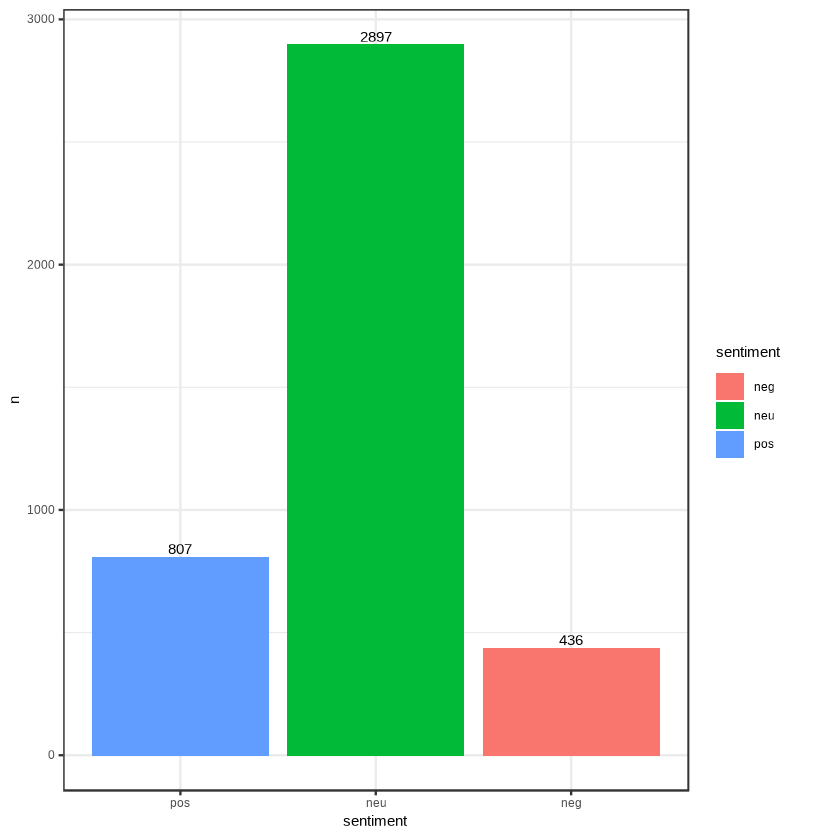

In [45]:
ggplot(frequency_score, aes(x = sentiment, y = n, fill = sentiment)) +
  geom_col() +
  geom_text(aes(label = n), vjust = -0.3) + 
  scale_x_discrete(limits = c("pos", "neu", "neg"))

# A tibble: 3 x 4
  sentiment     n ratio dummy
  <chr>     <int> <dbl> <dbl>
1 neg         436  10.5     0
2 neu        2897  70.0     0
3 pos         807  19.5     0


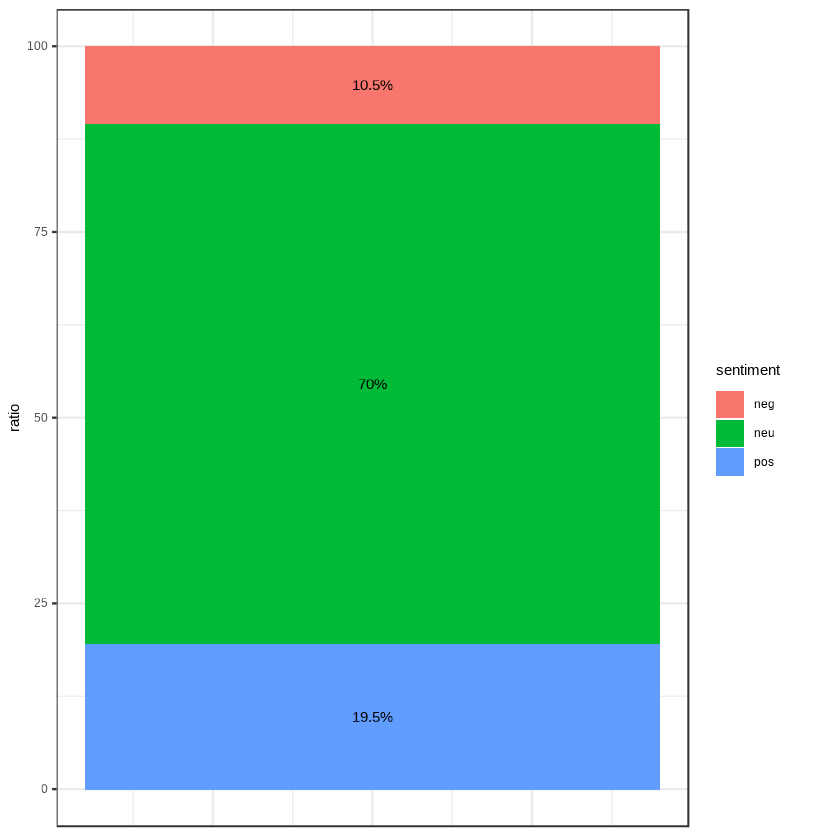

In [48]:
frequency_score$dummy <- 0
frequency_score %>% print

ggplot(frequency_score, aes(x = dummy, y = ratio, fill = sentiment)) +
  geom_col() +
  geom_text(aes(label = paste0(round(ratio, 1), "%")),      
              position = position_stack(vjust = 0.5)) + 
  theme(axis.title.x = element_blank(), 
        axis.text.x  = element_blank(), 
        axis.ticks.x = element_blank())  

### 04-03 감정 범주별 주요 단어 탐색

In [50]:
comment <- score_comment %>%
  unnest_tokens(input = reply,         
                output = word,
                token = "words",
                drop = F) %>%
  filter(str_detect(word, "[가-힣]") & str_count(word) >= 2)          

In [52]:
frequency_word <- comment %>%
  filter(str_count(word) >= 2) %>%
  count(sentiment, word, sort = T)

frequency_word %>% print

# A tibble: 19,223 x 3
   sentiment word               n
   <chr>     <chr>          <int>
 1 neu       축하합니다       214
 2 neu       봉준호           203
 3 neu       기생충           164
 4 neu       축하드립니다     155
 5 neu       정말             146
 6 neu       대박             134
 7 neu       진짜             121
 8 pos       봉준호           106
 9 pos       정말              97
10 neu       자랑스럽습니다    96
# ... with 19,213 more rows


### 상대적으로 자주 사용된 단어 비교

1. 로그 오즈비

In [54]:
comment_wide <- frequency_word %>%
  filter(sentiment != "neu") %>%  # 중립 제외
  pivot_wider(names_from = sentiment,
              values_from = n,
              values_fill = list(n = 0))

comment_wide %>% print

# A tibble: 8,380 x 3
   word         pos   neg
   <chr>      <int> <int>
 1 봉준호       106    47
 2 정말          97    32
 3 대단하다      83     1
 4 진짜          79    26
 5 자랑스럽다    78     1
 6 축하          63     0
 7 대한민국      61     4
 8 영화          58    18
 9 멋지다        55     0
10 기생충        53    33
# ... with 8,370 more rows


In [55]:
comment_wide <- comment_wide %>%
  mutate(log_odds_ratio = log(((pos + 1) / (sum(pos + 1))) /
                              ((neg + 1) / (sum(neg + 1)))))

comment_wide  %>% print

# A tibble: 8,380 x 4
   word         pos   neg log_odds_ratio
   <chr>      <int> <int>          <dbl>
 1 봉준호       106    47          0.589
 2 정말          97    32          0.876
 3 대단하다      83     1          3.52 
 4 진짜          79    26          0.873
 5 자랑스럽다    78     1          3.46 
 6 축하          63     0          3.95 
 7 대한민국      61     4          2.30 
 8 영화          58    18          0.920
 9 멋지다        55     0          3.81 
10 기생충        53    33          0.250
# ... with 8,370 more rows


In [56]:
top10 <- comment_wide %>%
  group_by(sentiment = ifelse(log_odds_ratio > 0, "pos", "neg")) %>%
  slice_max(abs(log_odds_ratio), n = 10)

top10 %>% print(n = Inf)

# A tibble: 30 x 5
# Groups:   sentiment [2]
   word         pos   neg log_odds_ratio sentiment
   <chr>      <int> <int>          <dbl> <chr>    
 1 소름           2    49          -3.03 neg      
 2 좌빨           1    21          -2.61 neg      
 3 못한           0     7          -2.29 neg      
 4 미친           0     7          -2.29 neg      
 5 좌좀           0     6          -2.16 neg      
 6 소름이         1    12          -2.08 neg      
 7 가난한         0     5          -2.00 neg      
 8 모르는         0     5          -2.00 neg      
 9 아쉽다         0     5          -2.00 neg      
10 닭그네         0     4          -1.82 neg      
11 돋았다         0     4          -1.82 neg      
12 두고           0     4          -1.82 neg      
13 못하고         0     4          -1.82 neg      
14 사회적         0     4          -1.82 neg      
15 싫다           0     4          -1.82 neg      
16 있는데         0     4          -1.82 neg      
17 정권이         0     4          -1.82 neg      
18 지들이         0     4        

In [57]:
top10 <- comment_wide %>%
  group_by(sentiment = ifelse(log_odds_ratio > 0, "pos", "neg")) %>%
  slice_max(abs(log_odds_ratio), n = 10, with_ties = F)

top10 %>% print

# A tibble: 20 x 5
# Groups:   sentiment [2]
   word         pos   neg log_odds_ratio sentiment
   <chr>      <int> <int>          <dbl> <chr>    
 1 소름           2    49          -3.03 neg      
 2 좌빨           1    21          -2.61 neg      
 3 못한           0     7          -2.29 neg      
 4 미친           0     7          -2.29 neg      
 5 좌좀           0     6          -2.16 neg      
 6 소름이         1    12          -2.08 neg      
 7 가난한         0     5          -2.00 neg      
 8 모르는         0     5          -2.00 neg      
 9 아쉽다         0     5          -2.00 neg      
10 닭그네         0     4          -1.82 neg      
11 축하          63     0           3.95 pos      
12 멋지다        55     0           3.81 pos      
13 대단한        47     0           3.66 pos      
14 좋은          42     0           3.55 pos      
15 대단하다      83     1           3.52 pos      
16 자랑스럽다    78     1           3.46 pos      
17 최고          27     0           3.12 pos      
18 세계적인      24     0           

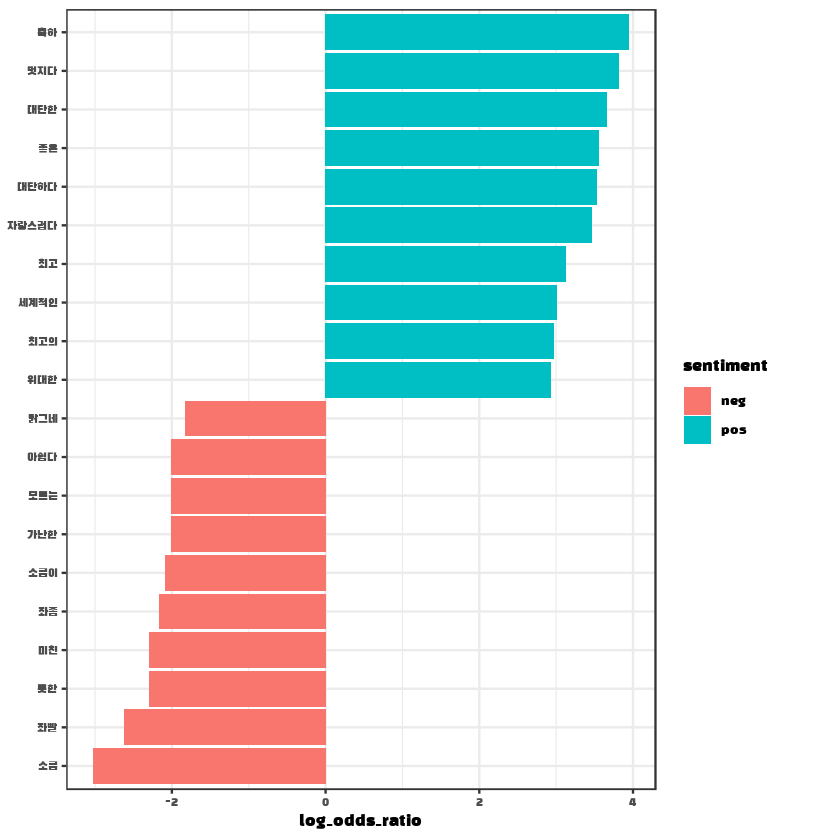

In [58]:
ggplot(top10, aes(x = reorder(word, log_odds_ratio),
                      y = log_odds_ratio,
                      fill = sentiment)) +
  geom_col() +
  coord_flip() +
  labs(x = NULL) +
  theme(text = element_text(family = "blackhansans"))

### 04-04 감성 사전 수정

In [61]:
# "소름"이 사용된 댓글
score_comment %>%
  filter(str_detect(reply, "소름")) %>%
  select(reply) %>% print

# "미친"이 사용된 댓글
score_comment %>%
  filter(str_detect(reply, "미친")) %>%
  select(reply) %>% print

# A tibble: 131 x 1
   reply                                                                       
   <chr>                                                                       
 1 소름돋네요                                                                  
 2 와..진짜소름 저 소리처음질렀어요 눈물나요.. ㅠㅠ                            
 3 생중계 보며 봉준호 할 때 소름이~~~!! ㅠㅠ 수상소감들으며 함께 가슴이 벅차네~
 4 와 보다가 소름 짝 수고들하셨어요                                            
 5 한국어 소감 듣는데 소름돋네 축하드립니다                                    
 6 대단하다!! 봉준호 이름 나오자마자 소름                                      
 7 와우 브라보~ 키아누리브스의 봉준호, 순간 소름이.. 멋지십니다.               
 8 소름 돋네요. 축하합니다                                                     
 9 소름.... 기생충 각본집 산거 다시한번 잘했다는 생각이ㅠㅠㅠ 축하해요!!!!!!   
10 소름끼쳤어요 너무 멋집니다 ^^!!!!                                           
# ... with 121 more rows
# A tibble: 15 x 1
   reply                                                                        
   <chr>                                                                 

In [62]:
dic %>% filter(word %in% c("소름", "소름이", "미친"))

word,polarity
<chr>,<dbl>
소름이,-2
소름,-2
미친,-2


### 감성 사전 수정

In [63]:
new_dic <- dic %>%
  mutate(polarity = ifelse(word %in% c("소름", "소름이", "미친"), 2, polarity))

new_dic %>% filter(word %in% c("소름", "소름이", "미친"))

word,polarity
<chr>,<dbl>
소름이,2
소름,2
미친,2


### 수정한 사전을 감정 점수 부여

In [64]:
new_word_comment <- word_comment %>%
  select(-polarity) %>%
  left_join(new_dic, by = "word") %>%
  mutate(polarity = ifelse(is.na(polarity), 0, polarity))

### 댓글별 감정 점수 구하기

In [66]:
new_score_comment <- new_word_comment %>%
  group_by(id, reply) %>%
  summarise(score = sum(polarity)) %>%
  ungroup()

new_score_comment %>%
  select(score, reply) %>%
  arrange(-score) %>% print

`summarise()` has grouped output by 'id'. You can override using the `.groups` argument.


# A tibble: 4,140 x 2
   score reply                                                                  
   <dbl> <chr>                                                                  
 1    11 아니 다른상을 받은것도 충분히 대단하고 굉장하지만 최고의 영예인 작품상~
 2     9 봉준호의 위대한 업적은 진보 영화계의 위대한 업적이고 대한민국의 업적입~
 3     8 소름 소름 진짜 멋지다 대단하다                                         
 4     7 이 수상소식을 듣고 억수로 기뻐하는 가족이 있을것 같다. SNS를 통해 자기~
 5     7 감사 감사 감사 수상 소감도 3관왕 답네요                                
 6     6 정말 우리 집에 좋은 일이 생겨 기쁘고 행복한 것처럼!! 나의 일인 양 행복~
 7     6 와 너무 기쁘다! 이 시국에 정말 내 일같이 기쁘고 감사하다!!! 축하드려요~
 8     6 축하 축하 축하 모두들 수고 하셨어요 기생충 화이팅                      
 9     6 생중계 보며 봉준호 할 때 소름이~~~!! ㅠㅠ 수상소감들으며 함께 가슴이 ~ 
10     6 축하!!!! 축하!!!!! 오스카의 정복은 무엇보다 시나리오의 힘이다. 작가의 ~
# ... with 4,130 more rows


### 감정 경향 살펴보기

1. 감정 분류

In [67]:
new_score_comment <- new_score_comment %>%
  mutate(sentiment = ifelse(score >=  1, "pos",
                     ifelse(score <= -1, "neg", "neu")))

2. 감정 범주별 빈도와 비율 구하기

In [70]:
# 원본 감정 사전 활용
score_comment %>%
  count(sentiment) %>%
  mutate(ratio = n / sum(n) * 100)

# 수정한 감정 사전 활용
new_score_comment %>%
  count(sentiment) %>%
  mutate(ratio = n / sum(n) * 100)

sentiment,n,ratio
<chr>,<int>,<dbl>
neg,436,10.53140
neu,2897,69.97585
pos,807,19.49275


sentiment,n,ratio
<chr>,<int>,<dbl>
neg,368,8.888889
neu,2890,69.806763
pos,882,21.304348


In [71]:
word <- "소름|소름이|미친"

# 원본 감정 사전 활용
score_comment %>%
  filter(str_detect(reply, word)) %>%
  count(sentiment)

# 수정한 감정 사전 활용
new_score_comment %>%
  filter(str_detect(reply, word)) %>%
  count(sentiment)

sentiment,n
<chr>,<int>
neg,73
neu,63
pos,9


sentiment,n
<chr>,<int>
neg,5
neu,56
pos,84


### 신조어에 감정 점수 부여

In [73]:
df <- tibble(sentence = c("이번 에피소드 쩐다", 
                          "이 영화 핵노잼")) %>% 
  unnest_tokens(input = sentence, 
                output = word, 
                token = "words", 
                drop = F)

df %>% 
  left_join(dic, by = "word") %>%
  mutate(polarity = ifelse(is.na(polarity), 0, polarity)) %>% 
  group_by(sentence) %>% 
  summarise(score = sum(polarity))

sentence,score
<chr>,<dbl>
이 영화 핵노잼,0
이번 에피소드 쩐다,0


In [74]:
# 신조어 목록 생성
newword <- tibble(word = c("쩐다", "핵노잼"), 
                  polarity = c(2, -2))

# 사전에 신조어 추가
newword_dic <- bind_rows(dic, newword)

# 새 사전으로 감정 점수 부여
df %>% 
  left_join(newword_dic, by = "word") %>%
  mutate(polarity = ifelse(is.na(polarity), 0, polarity)) %>% 
  group_by(sentence) %>% 
  summarise(score = sum(polarity))

sentence,score
<chr>,<dbl>
이 영화 핵노잼,-2
이번 에피소드 쩐다,2


### 감정 범주별 주요 단어 탐색

In [77]:
new_comment <- new_score_comment %>%
  unnest_tokens(input = reply,
                output = word,
                token = "words",
                drop = F) %>%
  filter(str_detect(word, "[가-힣]") &
           str_count(word) >= 2)

new_comment %>% print

# A tibble: 33,445 x 5
      id reply                                             score sentiment word 
   <int> <chr>                                             <dbl> <chr>     <chr>
 1     1 정말 우리 집에 좋은 일이 생겨 기쁘고 행복한 것처~     6 pos       정말 
 2     1 정말 우리 집에 좋은 일이 생겨 기쁘고 행복한 것처~     6 pos       우리 
 3     1 정말 우리 집에 좋은 일이 생겨 기쁘고 행복한 것처~     6 pos       집에 
 4     1 정말 우리 집에 좋은 일이 생겨 기쁘고 행복한 것처~     6 pos       좋은 
 5     1 정말 우리 집에 좋은 일이 생겨 기쁘고 행복한 것처~     6 pos       일이 
 6     1 정말 우리 집에 좋은 일이 생겨 기쁘고 행복한 것처~     6 pos       생겨 
 7     1 정말 우리 집에 좋은 일이 생겨 기쁘고 행복한 것처~     6 pos       기쁘~
 8     1 정말 우리 집에 좋은 일이 생겨 기쁘고 행복한 것처~     6 pos       행복~
 9     1 정말 우리 집에 좋은 일이 생겨 기쁘고 행복한 것처~     6 pos       것처~
10     1 정말 우리 집에 좋은 일이 생겨 기쁘고 행복한 것처~     6 pos       나의 
# ... with 33,435 more rows


In [79]:
new_frequency_word <- new_comment %>%
  count(sentiment, word, sort = T)

new_frequency_word %>% print

# A tibble: 19,188 x 3
   sentiment word               n
   <chr>     <chr>          <int>
 1 neu       축하합니다       214
 2 neu       봉준호           200
 3 neu       기생충           164
 4 neu       축하드립니다     151
 5 neu       정말             145
 6 neu       대박             134
 7 neu       진짜             120
 8 pos       봉준호           113
 9 pos       정말             110
10 neu       자랑스럽습니다    94
# ... with 19,178 more rows


In [80]:
new_comment_wide <- new_frequency_word %>%
  filter(sentiment != "neu") %>%
  pivot_wider(names_from = sentiment,
              values_from = n,
              values_fill = list(n = 0))

new_comment_wide %>% print

# A tibble: 8,408 x 3
   word         pos   neg
   <chr>      <int> <int>
 1 봉준호       113    43
 2 정말         110    20
 3 진짜          88    18
 4 대단하다      86     1
 5 자랑스럽다    78     1
 6 영화          63    17
 7 축하          63     0
 8 대한민국      61     4
 9 축하합니다    57     9
10 기생충        56    30
# ... with 8,398 more rows


In [81]:
new_comment_wide <- new_comment_wide %>%
  mutate(log_odds_ratio = log(((pos + 1) / (sum(pos + 1))) /
                              ((neg + 1) / (sum(neg + 1)))))

new_comment_wide %>% print

# A tibble: 8,408 x 4
   word         pos   neg log_odds_ratio
   <chr>      <int> <int>          <dbl>
 1 봉준호       113    43          0.674
 2 정말         110    20          1.39 
 3 진짜          88    18          1.27 
 4 대단하다      86     1          3.49 
 5 자랑스럽다    78     1          3.40 
 6 영화          63    17          0.990
 7 축하          63     0          3.88 
 8 대한민국      61     4          2.24 
 9 축하합니다    57     9          1.48 
10 기생충        56    30          0.331
# ... with 8,398 more rows


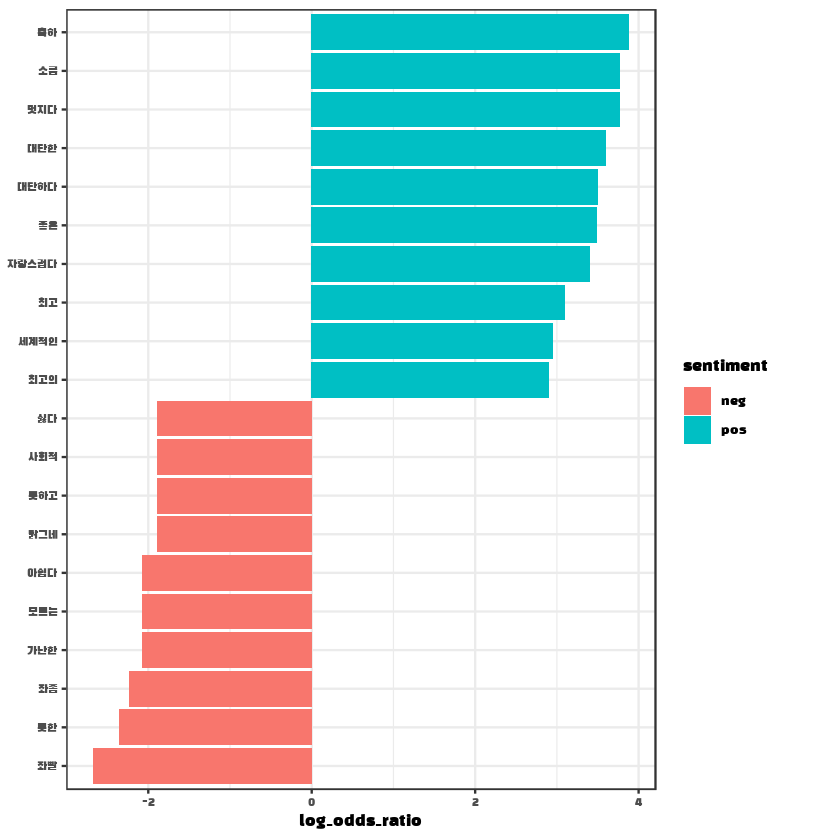

In [82]:
new_top10 <- new_comment_wide %>%
  group_by(sentiment = ifelse(log_odds_ratio > 0, "pos", "neg")) %>%
  slice_max(abs(log_odds_ratio), n = 10, with_ties = F)

ggplot(new_top10, aes(x = reorder(word, log_odds_ratio),
                      y = log_odds_ratio,
                      fill = sentiment)) +
  geom_col() +
  coord_flip() +
  labs(x = NULL) +
  theme(text = element_text(family = "blackhansans"))

### 주요 단어가 사용된 댓글 탐색

In [87]:
new_score_comment %>%
  filter(sentiment == "pos" & str_detect(reply, "축하")) %>%
  select(reply) %>% print

# A tibble: 189 x 1
   reply                                                                        
   <chr>                                                                        
 1 정말 우리 집에 좋은 일이 생겨 기쁘고 행복한 것처럼!! 나의 일인 양 행복합니다~
 2 와 너무 기쁘다! 이 시국에 정말 내 일같이 기쁘고 감사하다!!! 축하드려요 진심~ 
 3 우리나라의 영화감독분들 그리고 앞으로 그 꿈을 그리는 분들에게 큰 영감을 주시~
 4 아카데미나 다른 상이나 지들만의 잔치지~ 난 대한민국에서 받는 상이 제일 가치 ~
 5 정부에 빨대 꼽은 정치시민단체 기생충들이 득실거리는 떼한민국애서 훌륭한 영화~
 6 대단해요 나는 안봤는데 그렇게 잘 만들어 한국인의 기백을 세계에 알리는 큰 일~ 
 7 나한테 돌아오는게 하나도 없는데 왜이렇게 자랑스럽지?ㅎㅎㅎ 축하 합니다~작품~ 
 8 한국영화 100년사에 한횟을 긋네요. 정말 축하 합니다                           
 9 와 대단하다 진짜 축하드려요!!! 대박 진짜                                     
10 각본상, 국제 영화상 수상 축하. 편집상은 꽝남.                                
# ... with 179 more rows


In [88]:
new_score_comment %>%
  filter(sentiment == "pos" & str_detect(reply, "소름")) %>%
  select(reply) %>% print

# A tibble: 77 x 1
   reply                                                                        
   <chr>                                                                        
 1 생중계 보며 봉준호 할 때 소름이~~~!! ㅠㅠ 수상소감들으며 함께 가슴이 벅차네~ 
 2 와 보다가 소름 짝 수고들하셨어요                                             
 3 대단하다!! 봉준호 이름 나오자마자 소름                                       
 4 와우 브라보~ 키아누리브스의 봉준호, 순간 소름이.. 멋지십니다.                
 5 소름 돋네요. 축하합니다                                                      
 6 소름.... 기생충 각본집 산거 다시한번 잘했다는 생각이ㅠㅠㅠ 축하해요!!!!!!    
 7 봉준호 아저씨 우리나라 자랑입니다 헐리웃 배우들과 화면에 같이 비춰지는게 아~ 
 8 추카해요. 봉준호하는데 막 완전 소름 돋았어요.                                
 9 소름돋아서 닭살돋고.. 그냥 막 감동이라 눈물이 나려했어요.. 대단하고 자랑스럽~
10 한국 영화 최초 아카데미상 수상, 92년 역사의 국제 장편 영화상과 최우수작품상 ~
# ... with 67 more rows


In [89]:
new_score_comment %>%
  filter(sentiment == "neg" & str_detect(reply, "좌빨")) %>%
  select(reply) %>% print

# A tibble: 34 x 1
   reply                                                                        
   <chr>                                                                        
 1 자칭 보수들은 분노의 타이핑중 ㅋㅋㅋㅋㅋㅋ전세계를 좌빨로 몰수는 없고 자존심~
 2 자칭보수 왈 : 미국에 로비했다 ㅋㅋ좌빨영화가 상받을리 없다 ㅋㅋㅋㅋㅋㅋㅋ 본~
 3 좌빨 봉준호 영화는 쳐다도 안본다 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ                      
 4 봉준호 그렇게 미국 싫어하는데 상은 쳐 받으러 가는 좌빨 수준ㅋㅋㅋ            
 5 좌빨 기생충들은 댓글도 달지마라 미국 영화제 수상이 니들하고 뭔상관인데.      
 6 얘들은 왜 인정을 안하냐? ㅋㅋ 니들 이미 변호인 찍을대 부터 송강호 욕해대고 ~ 
 7 넷상 보수들 만큼 이중적인 새1끼들 없음. 봉준호 송강호 보고 종북좌빨 홍어드립~
 8 우선 축하합니다.그리고 다음에는 조씨가족을 모델로한 뻔뻔하고 거짓말을 밥 먹~ 
 9 Korea 대단합니다 김연아 방탄 봉준호 스포츠 음악 영화 못하는게 없어요 좌빨 감~
10 좌빨 감독이라고 블랙리스트에 올랐던 사람을 세계인이 인정해주네. 방구석에 앉~ 
# ... with 24 more rows


In [90]:
new_score_comment %>%
  filter(sentiment == "neg" & str_detect(reply, "못한")) %>%
  select(reply) %>% print

# A tibble: 7 x 1
  reply                                                                         
  <chr>                                                                         
1 한번도경험하지. 못한 조국가족사기단기생충. 개봉박두                           
2 여기서 정치얘기하는 건 학창시절 공부 못한 거 인증하는 꼴... 주제좀 벗어나지 ~ 
3 이 기사를 반문으로 먹고 사는 자유왜국당과, mb아바타 간철수 댓글알바들이 매우 ~
4 한국미국일본 vs 주적북한,중국러시아 이 구도인 현 시대 상황 속에서, 미국 일본~ 
5 친일수꼴 들과 자한당넘들이 나라에 경사만 있으면 엄청 싫어합니다, 맨날 사고만 ~
6 각본상,국제상,감독상 ...어디서 듣도보도 못한 아차상 같은 쩌리처리용 상 아닌가~
7 난 밥을 먹고 기생충은 오스카를 먹다, 기생충은 대한민국의 국격을 높였는데 난 ~ 


### 분석 결과 비교

In [92]:
# 원본 감정 사전 활용
top10 %>% 
  select(-pos, -neg) %>% 
  arrange(-log_odds_ratio) %>% print

# 수정한 감정 사전 활용
new_top10 %>%
  select(-pos, -neg) %>%
  arrange(-log_odds_ratio) %>% print

# A tibble: 20 x 3
# Groups:   sentiment [2]
   word       log_odds_ratio sentiment
   <chr>               <dbl> <chr>    
 1 축하                 3.95 pos      
 2 멋지다               3.81 pos      
 3 대단한               3.66 pos      
 4 좋은                 3.55 pos      
 5 대단하다             3.52 pos      
 6 자랑스럽다           3.46 pos      
 7 최고                 3.12 pos      
 8 세계적인             3.01 pos      
 9 최고의               2.97 pos      
10 위대한               2.92 pos      
11 닭그네              -1.82 neg      
12 가난한              -2.00 neg      
13 모르는              -2.00 neg      
14 아쉽다              -2.00 neg      
15 소름이              -2.08 neg      
16 좌좀                -2.16 neg      
17 못한                -2.29 neg      
18 미친                -2.29 neg      
19 좌빨                -2.61 neg      
20 소름                -3.03 neg      
# A tibble: 20 x 3
# Groups:   sentiment [2]
   word       log_odds_ratio sentiment
   <chr>               <dbl> <chr>    
 1 축하                 3.88 pos

In [94]:
new_comment_wide %>%
  filter(word == "미친")

word,pos,neg,log_odds_ratio
<chr>,<int>,<int>,<dbl>
미친,7,0,1.801158


### Q1

In [121]:
raw_news_comment <- read_csv("news_comment_BTS.csv")
raw_news_comment %>% print

Rows: 1200 Columns: 5
-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ","
chr  (4): reply, press, title, url
dttm (1): reg_time

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 1,200 x 5
   reg_time            reply                                   press title url  
   <dttm>              <chr>                                   <chr> <chr> <chr>
 1 2020-09-01 22:58:09 "국보소년단<U+0001F49C>"                한국~ [속~  http~
 2 2020-09-01 09:56:46 "아줌마가 들어도 좋더라"                한국~ [속~  http~
 3 2020-09-01 09:08:06 "팩트체크\n\n현재 빌보드 HOT 100\n\n1~  한국~ [속~  http~
 4 2020-09-01 08:52:32 "방탄소년단이 한국사람이라 너무 자랑스~ 한국~ [속~  http~
 5 2020-09-01 08:36:33 "대단한 BTS, 월드 클래스는 다르네^^ 좋~ 한국~ [속~  http~
 6 2020-09-01 08:34:14 "정국오빠 생일과 더불어 빌보드 1위기사~ 한국~ [속~  http~
 7 2020-09-01 08:32:14 "정말 축하하고 응원하지만\n집에서 여러~ 한국~ [속~  http~
 8 2020-09-01 08:22:09 "기자는 자고 일어났지만, 팬들은 못자고~ 한국~ [속~  http~
 9 2020-09-01 08:17:58 "자랑스럽다!!!!!! 축하합니다!!!!"       한국~ [속~  http~
10 2020-09-01 08:15:37 "SuperM 늘 응원하고 사랑합니다~"        한국~ [속~  http~
# ... with 1,190 more rows


In [216]:
news_comment <- raw_news_comment %>%
  mutate(id = row_number(),
         reply = str_squish(replace_html(reply)))

news_comment %>%
  select(id, reply)  %>% print

# A tibble: 1,200 x 2
      id reply                                                                  
   <int> <chr>                                                                  
 1     1 국보소년단                                                             
 2     2 아줌마가 들어도 좋더라                                                 
 3     3 팩트체크 현재 빌보드 HOT 100 1위 방탄소년단[BTS] 2위 Cardi B ft. Megan~
 4     4 방탄소년단이 한국사람이라 너무 자랑스러워요 ㅠㅠ 우리오래오래 함께하자!
 5     5 대단한 BTS, 월드 클래스는 다르네^^ 좋은 소식!! 응원해요                
 6     6 정국오빠 생일과 더불어 빌보드 1위기사라니ㅠㅠ축제구나                  
 7     7 정말 축하하고 응원하지만 집에서 여러 계정으로 스트리밍 돌리고 사재기하~
 8     8 기자는 자고 일어났지만, 팬들은 못자고 발표 기다림                      
 9     9 자랑스럽다!!!!!! 축하합니다!!!!                                        
10    10 SuperM 늘 응원하고 사랑합니다~                                         
# ... with 1,190 more rows


### Q2

In [218]:
word_comment <- news_comment %>%
  unnest_tokens(input = reply,
                output = word,
                token = "words", 
                drop = F)         

word_comment %>%
  select(word) %>% print

# A tibble: 11,673 x 1
   word      
   <chr>     
 1 국보소년단
 2 아줌마가  
 3 들어도    
 4 좋더라    
 5 팩트체크  
 6 현재      
 7 빌보드    
 8 hot       
 9 100       
10 1         
# ... with 11,663 more rows


In [219]:
dic <- read_csv("knu_sentiment_lexicon.csv")

word_comment <- word_comment %>%
  left_join(dic, by = "word") %>%
  mutate(polarity = ifelse(is.na(polarity), 0, polarity))

word_comment %>%
  select(word, polarity) %>%
  arrange(-polarity) %>% print

Rows: 14854 Columns: 2
-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ","
chr (1): word
dbl (1): polarity

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 11,673 x 2
   word       polarity
   <chr>         <dbl>
 1 대단한            2
 2 좋은              2
 3 자랑스럽다        2
 4 자랑스럽다        2
 5 자랑스럽다        2
 6 장하다            2
 7 꾸준히            2
 8 행복한            2
 9 대단한            2
10 대단한            2
# ... with 11,663 more rows


In [220]:
score_comment <- word_comment %>%
  group_by(id, reply) %>%
  summarise(score = sum(polarity)) %>%
  ungroup()

score_comment %>%
  select(score, reply) %>%
  arrange(-score) %>% print

`summarise()` has grouped output by 'id'. You can override using the `.groups` argument.


# A tibble: 1,194 x 2
   score reply                                                                  
   <dbl> <chr>                                                                  
 1     8 멋지다, 자랑스럽다, 대단하다 방탄소년단!!! 다이너마이트 빌보드 핫100 1~
 2     7 팬은 아니야. 그래서 저 노력과 업적이 더 대단해보여. 정말 멋지다. 잘생~ 
 3     6 축하 합니다 우리에 보물이네 대한미국에 애국자 들이다 나라 홍보도하고 ~ 
 4     6 우리딸이 보는 눈이 있네 호르몬전쟁 노래부터 애네들 좋아했는데 그때는 ~ 
 5     6 ㅜㅜ . 진짜 이 코로나에 너희들이 빛이여. 핫백 1위라니. 모든 기록을 다 ~
 6     6 축하 축하 아미분들도 축하^^                                            
 7     6 정말 대단하고 자랑스럽습니다.. 국격이 업그레이드 된거 같습니다..축하 ~ 
 8     6 빌보드 핫100 1위 축하해요 여기까지 오느라 힘들었을텐데 수고했어요 앞으~
 9     6 진짜 대단하다. K팝 아시아 최고 넘어서 빌보드 1위 등극 이제 BTS가 그냥 ~
10     6 정국이 생일에 빌보드 핫100 1위라니... 정말 뜻깊은 하루네요ㅠㅠ 좋은 음~
# ... with 1,184 more rows


### Q3

In [221]:
score_comment <- score_comment %>%
  mutate(sentiment = ifelse(score >=  1, "pos",
                     ifelse(score <= -1, "neg", "neu")))

score_comment %>%
  select(sentiment, reply) %>% print

# A tibble: 1,194 x 2
   sentiment reply                                                              
   <chr>     <chr>                                                              
 1 neu       국보소년단                                                         
 2 neu       아줌마가 들어도 좋더라                                             
 3 pos       팩트체크 현재 빌보드 HOT 100 1위 방탄소년단[BTS] 2위 Cardi B ft. M~
 4 neg       방탄소년단이 한국사람이라 너무 자랑스러워요 ㅠㅠ 우리오래오래 함께~
 5 pos       대단한 BTS, 월드 클래스는 다르네^^ 좋은 소식!! 응원해요            
 6 neg       정국오빠 생일과 더불어 빌보드 1위기사라니ㅠㅠ축제구나              
 7 neu       정말 축하하고 응원하지만 집에서 여러 계정으로 스트리밍 돌리고 사재~
 8 neu       기자는 자고 일어났지만, 팬들은 못자고 발표 기다림                  
 9 pos       자랑스럽다!!!!!! 축하합니다!!!!                                    
10 neu       SuperM 늘 응원하고 사랑합니다~                                     
# ... with 1,184 more rows


sentiment,n
<chr>,<int>
neg,113
neu,743
pos,338


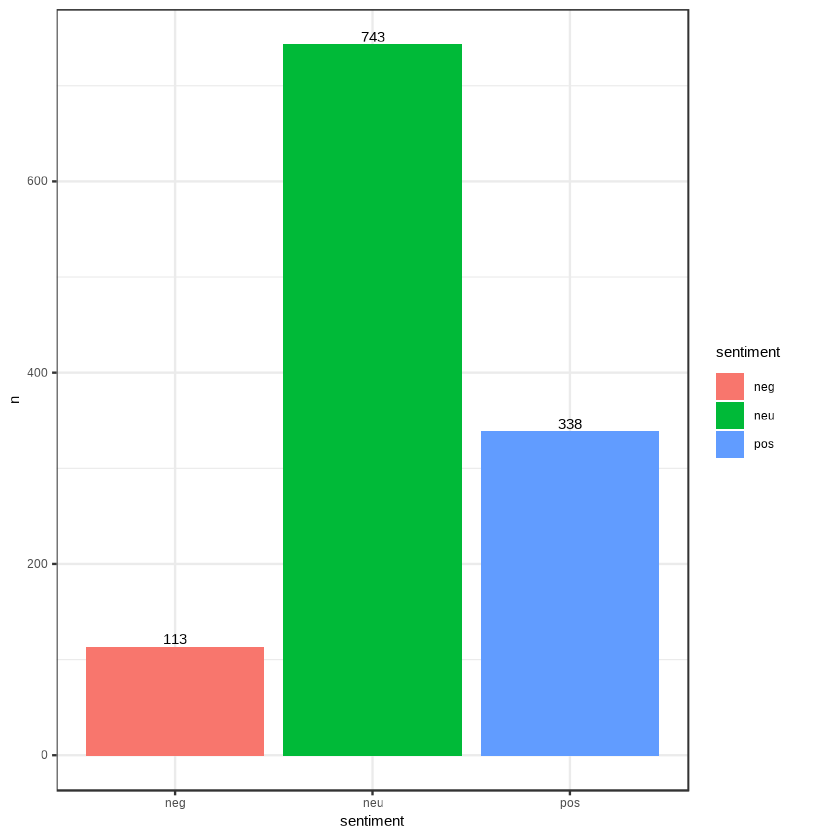

In [222]:
frequency_score <- score_comment %>%
  count(sentiment)

frequency_score

ggplot(frequency_score, aes(x = sentiment, y = n, fill = sentiment)) +
  geom_col() +
  geom_text(aes(label = n), vjust = -0.3)

### Q4

In [224]:
comment <- score_comment %>%
  unnest_tokens(input = reply,
                output = word,
                token = "words",
                drop = F)

frequency_word <- comment %>%
  count(sentiment, word, sort = T)

frequency_word %>% print

# A tibble: 6,900 x 3
   sentiment word           n
   <chr>     <chr>      <int>
 1 neu       1            126
 2 pos       진짜          90
 3 pos       1             82
 4 neu       진짜          79
 5 pos       자랑스럽다    77
 6 neu       bts           72
 7 pos       너무          70
 8 neu       빌보드        66
 9 pos       정말          57
10 neu       군면제        48
# ... with 6,890 more rows


### Q5

In [225]:
comment_wide <- frequency_word %>%
  filter(sentiment != "neu") %>%
  pivot_wider(names_from = sentiment,
              values_from = n,
              values_fill = list(n = 0))

comment_wide %>% print

# A tibble: 3,247 x 3
   word         pos   neg
   <chr>      <int> <int>
 1 진짜          90    20
 2 1             82    29
 3 자랑스럽다    77     0
 4 너무          70    14
 5 정말          57     5
 6 위            46    11
 7 빌보드        40    15
 8 방탄          39     8
 9 방탄소년단    39    13
10 bts           37    21
# ... with 3,237 more rows


In [226]:
comment_wide <- comment_wide %>%
  mutate(log_odds_ratio = log(((pos + 1) / (sum(pos + 1))) /
                              ((neg + 1) / (sum(neg + 1)))))

comment_wide %>% print

# A tibble: 3,247 x 4
   word         pos   neg log_odds_ratio
   <chr>      <int> <int>          <dbl>
 1 진짜          90    20          1.03 
 2 1             82    29          0.586
 3 자랑스럽다    77     0          3.93 
 4 너무          70    14          1.12 
 5 정말          57     5          1.84 
 6 위            46    11          0.934
 7 빌보드        40    15          0.510
 8 방탄          39     8          1.06 
 9 방탄소년단    39    13          0.618
10 bts           37    21          0.115
# ... with 3,237 more rows


In [227]:
top10 <- comment_wide %>%
  group_by(sentiment = ifelse(log_odds_ratio > 0, "pos", "neg")) %>%
  slice_max(abs(log_odds_ratio), n = 10)

top10 %>% print

# A tibble: 25 x 5
# Groups:   sentiment [2]
   word     pos   neg log_odds_ratio sentiment
   <chr>  <int> <int>          <dbl> <chr>    
 1 국내       0     5          -2.22 neg      
 2 모르는     0     4          -2.04 neg      
 3 없어서     0     4          -2.04 neg      
 4 있다       0     4          -2.04 neg      
 5 널리       0     3          -1.82 neg      
 6 독도       0     3          -1.82 neg      
 7 보다       0     3          -1.82 neg      
 8 아니다     0     3          -1.82 neg      
 9 없다       0     3          -1.82 neg      
10 케이팝     0     3          -1.82 neg      
# ... with 15 more rows


### Q6

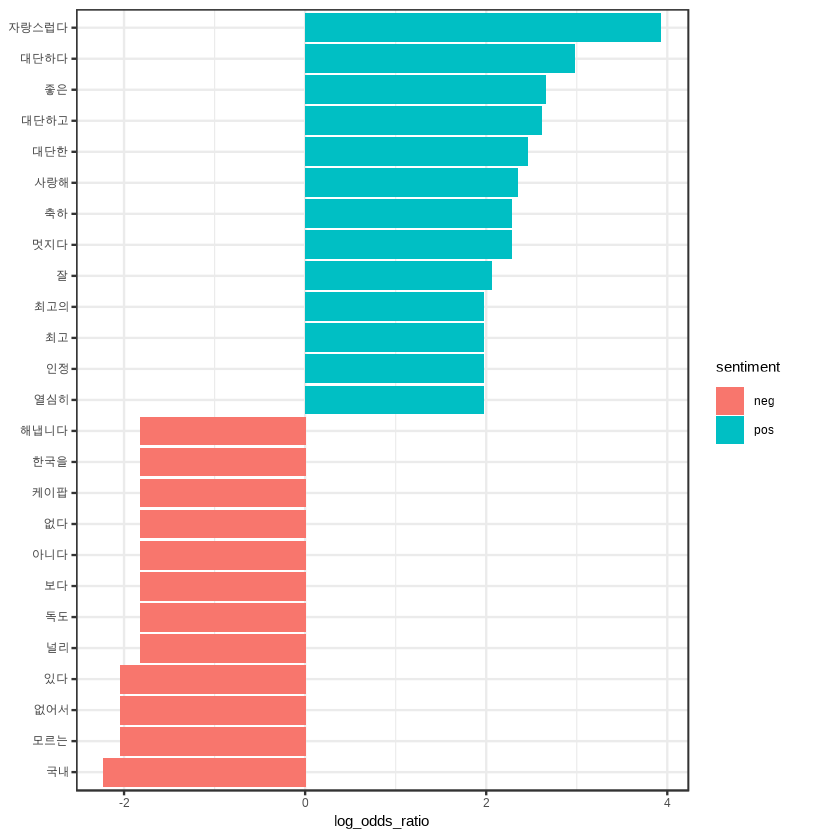

In [228]:
ggplot(top10, aes(x = reorder(word, log_odds_ratio),
                      y = log_odds_ratio,
                      fill = sentiment)) +
  geom_col() +
  coord_flip() +
  labs(x = NULL)

### Q7

In [229]:
score_comment %>%
  filter(str_detect(reply, "자랑스럽다")) %>%
  arrange(-score) %>%
  select(reply) %>% print

# A tibble: 82 x 1
   reply                                                                        
   <chr>                                                                        
 1 멋지다, 자랑스럽다, 대단하다 방탄소년단!!! 다이너마이트 빌보드 핫100 1위 진~ 
 2 축하 합니다 우리에 보물이네 대한미국에 애국자 들이다 나라 홍보도하고 달라도~ 
 3 자랑스러운 방탄소년단.... 아~~이거 방탄소년단 아입니까!!!! 사랑하는 막둥이정~
 4 자랑스럽다 역사적인 길들을 함께 걸어갈 수 있어 감사하다                      
 5 아시아에서 60년만에 빌보드 핫백 차트 1위 아시아에서 최초로 200차트와 핫백 차~
 6 와 진짜 너무 대단하고 자랑스럽다 ! 진짜 꿈인지 생시인지 모르겠네요! 이건 정~ 
 7 정말 대단하고 자랑스럽다~                                                    
 8 이건 진짜 대서특필 감이다.. 혼란스러운 이 시국에 이렇게 기쁜 소식이라니 진짜~
 9 진짜 대박이다 방탄 역사를 썼다 대단하고 자랑스럽다!!!!                       
10 정말 너무 자랑스럽다. 역사의 순간에 있다는 게 고맙고 뿌듯하다                
# ... with 72 more rows


### Q8

In [230]:
score_comment %>%
  filter(str_detect(reply, "국내")) %>%
  arrange(score) %>%
  select(reply) %>% print

# A tibble: 10 x 1
   reply                                                                        
   <chr>                                                                        
 1 "국위선양 한건 대단 하지만 40대 이후로는 BTS 이름만 알지 히트곡은 전혀모름 ~ 
 2 "국내 국악대회 거기 입상한 애들도 군대 안간다던데 세계 1위 한거 인정해서 면~ 
 3 "아니 진짜 군면제하자 뭘더 얼마나 일등을 해야해 국내 클래식 콩쿨 1등해도 면~ 
 4 "진짜 세계를 kpop이 이렇게 휩쓸고 있는데, 정작 국내는 뽕짝만 주구장창 나오는~
 5 "아시아 아티스트로서는 57년만이랍니다... 방탄소년단 국내 시상식 대상도 못받~ 
 6 "bts 너무 자랑스러워요 국내에는 웃을일이 없는데 bts 때문에 기분이 좋네요"    
 7 "이렇게 국위선양하고 BTS때문에 파생되는 경제효과는 어마어마한데 애들은 군대 ~
 8 "그냥 국내 1등 아이돌 가수같은데 감흥이없네 여튼 축하해요"                   
 9 "아니 진짜 방탄 팬도아니고 그냥 노래 나오면 즐겨듣는정돈데 방탄 군대 왜보냄 ~
10 "국내 콩쿨에서 입상해도 군면제 해주는데... 신지어 빌보드 1위인데.. 군대 보내~
